License Plate Masking


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import tensorflow as tf
from sklearn.metrics import f1_score 

In [ ]:
# Loads the data required for detecting the license plates from cascade classifier.
plate_cascade = cv2.CascadeClassifier('./indian_license_plate.xml')
# add the path to 'india_license_plate.xml' file.

In [ ]:
def detect_plate(img, text=''): # the function detects and perfors blurring on the number plate.
    plate_img = img.copy()    
    roi = img.copy()
    plate_rect = plate_cascade.detectMultiScale(plate_img, scaleFactor = 1.5, minNeighbors = 3,minSize=[0,1]) # detects numberplates and returns the coordinates and dimensions of detected license plate's contours.
    for (x,y,w,h) in plate_rect:
        roi_ = roi[y:y+h, x:x+w, :] # extracting the Region of Interest of license plate for blurring.
        plate = roi[y:y+h, x:x+w, :]
        res=cv2.rectangle(plate_img, (x+2,y), (x+w-3, y+h-5), (0,0,0), -1) # finally representing the detected contours by drawing rectangles around the edges.
        
    if text!='':
        plate_img = cv2.putText(plate_img, text, (x-w//2,y-h//2), 
                                cv2.FONT_HERSHEY_COMPLEX_SMALL , 0.5, (51,181,155), 1, cv2.LINE_AA)
        
    return plate_img.astype(np.uint8), plate # returning the processed image.

In [ ]:
#plate_img.astype(np.uint8)

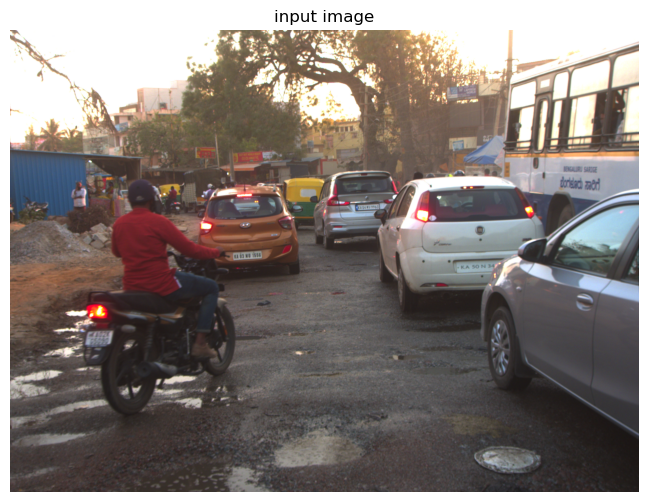

In [ ]:
import os
# Testing the above function
def display(img_, title=''):
    img = cv2.cvtColor(img_, cv2.COLOR_BGR2RGB)
    fig = plt.figure(figsize=(10,6))
    ax = plt.subplot(111)
    ax.imshow(img)
    plt.axis('off')
    plt.title(title)
    plt.show()
  

#image_files = os.listdir(image_directory)

#for image_file in image_files:

    """"image_path = os.path.join(image_directory, image_file)

    img = cv2.imread(image_directory)
    width=1
    height=900

    resize = cv2.resize(img,(width,height))

    output_img,plate = detect_plate(resize)

    cv2.imshow("Original Image", resize)
    cv2.imshow("Processed Image", output_img)

    cv2.waitKey(0)
    cv2.destroyAllWindows()"""

img = cv2.imread('./9.png')
display(img, 'input image')

In [ ]:
# Getting plate prom the processed image
output_img, plate = detect_plate(img)

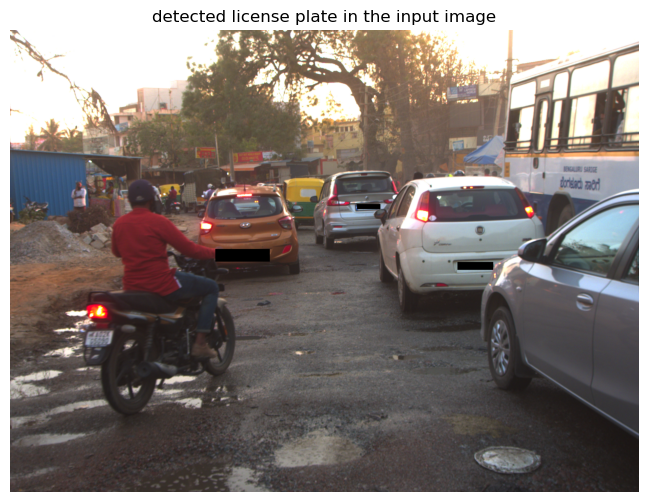

In [ ]:
display(output_img, 'detected license plate in the input image')